<a href="https://colab.research.google.com/github/sharmaparnika/Logistic-Regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Logistic Regression Implementation in Python**

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
dataset = pd.read_csv("/content/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Checking for missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Median of the Age column
print('Median of Age column: %.2f' % (dataset["Age"].median(skipna = True)))
#Percentage of missing records in the Cabin column
print('Percent of missing records in the Cabin column: %.2f%%' %((dataset['Cabin'].isnull().sum()/dataset.shape[0])*100))
#Most common boarding port of embarkation
print('Most common boarding port of embarkation: %s' %dataset['Embarked'].value_counts().idxmax())

Median of Age column: 28.00
Percent of missing records in the Cabin column: 77.10%
Most common boarding port of embarkation: S


In [ ]:
#Filling Age column by median
dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)
#Fillimg Embarked column by the most common port of embarkation
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(), inplace=True)
#Dropping the cabin columns
dataset.drop('Cabin', axis=1, inplace=True)

In [ ]:
#Checking for missing values
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Dropping unnecessary columns
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket',  axis=1, inplace=True)

In [ ]:
#Creating variable TravelAlone
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0, 1)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
dataset.shape

(891, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
dataset.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      577
female    314
Name: Sex, dtype: int64

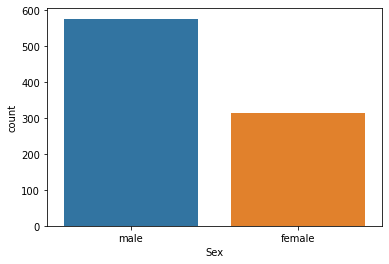

In [ ]:
#Count of passengers based on gender
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


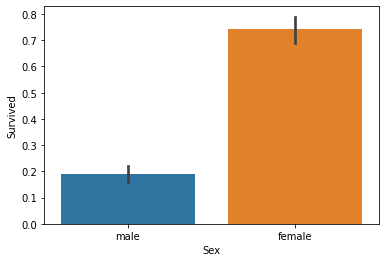

In [ ]:
#Percentage of passengers survived grouped by gender
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

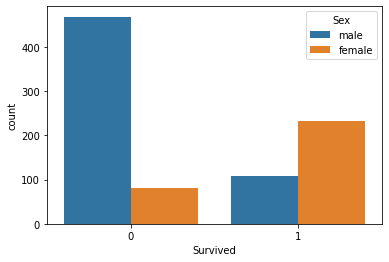

In [ ]:
#Count of passengers survived based on gender
sns.countplot(x='Survived', hue='Sex', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    491
1    216
2    184
Name: Pclass, dtype: int64

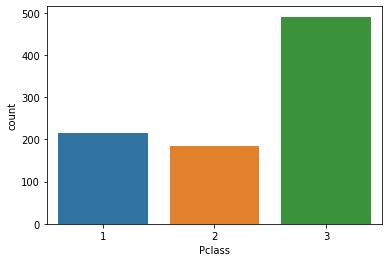

In [ ]:
#Count of passengers based on Pclass
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


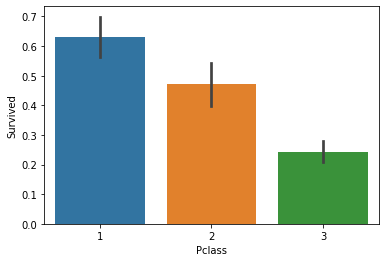

In [ ]:
#Precentage of passengers survived grouped by Pclass
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

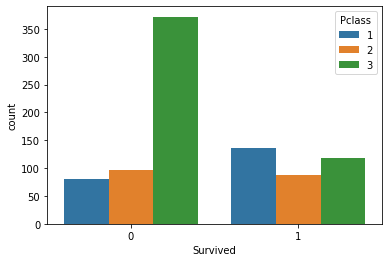

In [ ]:
#Count of passengers survived based on Pclass
sns.countplot(x='Survived', hue='Pclass', data=dataset)

---